# Supplier Selection - Notebook 1
Prepared by: Nickolas Freeman, Ph.D.

This notebook is the first in a series that consider techniques for supplier selection. The techniques presented in this notebook are useful for identifying a subset of candidate suppliers from a potentially large set of available suppliers. The difficulty in such selection is that oftentimes there are several competing criteria that we want to use for the purpose of evaluation. For example, buying firms care about both cost and quality. However, it may be impossible to find a supplier that offers exceptional performance with respect to both criteria because the two criteria may be related (e.g., the supplier is able to offer products at a lower cost because they do not enforce very stringent quality controls). 

Another complicating factor is that it is common for a buying firm to be interested in both quantitative and qualitative criteria. However, comparing scores for quantitative and qualitative aspects is difficult. For example, how much of a cost increase is improved technical support or sustainability efforts worth?

The approaches we consider in this notebook assign a quantitative score to subjective criteria and employ relatively simple weighting techniques to determine overall scores. First, we will import the packages that we are going to use.

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 100

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

import seaborn as sns

%matplotlib inline

from ipywidgets import interact

Throughout this notebook, we will be using a dataset that includes scores for 100 suppliers on several qualitative and quantitative factors. The following code block reads in the data, which is in a .csv file named "Supplier_Data.csv" that should be located in a sub-folder of the current working directory that is named *data*. The 'Warranty Terms,' 'Payment Terms,' 'Technical Support,' 'Sustainability Efforts,' and 'Financial Stability' columns include subjective scores for each supplier that range from 1-10, with 1 being the lowest rating and 10 being the highest rating.

In [2]:
supplier_data = pd.read_csv("data/Supplier_Data.csv")
supplier_data.head(10)

,Supplier,Warranty Terms,Payment Terms,Technical Support,Sustainability Efforts,Financial Stability,Unit Cost,Lead Time (Days),On Time Delivery
0,1,2.42,2.80,8.25,3.09,8.21,1.05,8,0.75
1,2,6.51,1.88,3.60,6.45,4.31,1.21,13,0.83
2,3,8.51,1.06,2.97,9.36,5.06,1.22,12,0.91
3,4,4.63,4.60,5.84,7.34,9.20,1.01,9,0.72
4,5,4.62,7.44,1.50,8.93,4.01,1.03,7,0.97
5,6,7.87,6.58,2.93,6.88,6.30,1.18,14,0.83
6,7,8.87,5.94,3.32,7.45,3.00,1.13,6,1.00
7,8,9.15,4.35,1.28,9.20,3.07,1.04,15,0.81
8,9,8.16,2.39,1.74,8.80,9.41,1.02,8,0.95
9,10,1.66,7.70,4.11,5.76,5.72,1.10,11,0.98


# Weighted Methods for Supplier Rating
As mentioned before, the methods we consider in this notebook allow us to consider both qualitative and quantitative criteria. Qualititative criteria are considered by assigned a value that ranks eash supplier on the qualitative dimension and weighting these values to compute a weighted score for each supplier. We will consider two variants of such a weighted method. The first method sums the weighted scores for the various attributes and the second computes the product of the attributes scores raised to the power specified by the weight.

## Weighted Sum Ranking Method
The weighted sum approach we are going to look at is arguably the best known and simplest method for evaluating a set of alternatives according to a number of criteria. 

>[The weighted sum method of supplier rating determines a] weighted point [estimate for each supplier], which consider attributes that are weighted by the buyer. The weight for each attribute is then multiplied by the performance score that is assigned. Finally, these products are totaled to determine final rating for each supplier. Typically this system is designed to utilize quantitative measurements. The advantages of the weighted point method include the ability for the organization to include numerous evaluation factors and assign them weights according to the organization’s needs. The subjective factors on the evaluation are minimized. The major limitation of this approach is that it is difficult to effectively take qualitative evaluation criteria into consideration.

> - Khaled, A.A., Paul, S. K., Ripon Kumar Chakrabortty, M., & Ayuby, S. (2011). Selection of suppliers through different multi-criteria decision making techniques. Global Journal of Management and Business Research, 11(4).

Assume that we want to evaluate $m$ alternatives (suppliers) on $n$ criteria and that higher values of all criteria are better. Let $w_{j}$ denote the relative weight of criterion $C_{j}$ and $a_{ij}$ denote the score of alternative $A_{i}$ when in terms of criterion $C_{j}$. Using the described notation, the weighted sum score for alternative $A_{i}$ is given by:

$$\sum_{j=1}^{n}w_{j}a_{ij},\mbox{ for }i=1,2,3,\ldots,m.$$

The following code block provides an example of how the weighted sum method works. Specifically, the code block allows you to define values for the qualitative criteria that pertain to a single supplier, specify the associated weights, and compute the weighted sum score for the supplier. We will use weight values between 1 and 10. However, the code will accommodate any range of weight values because it performs a normalization step that transforms the weights so that their sum equals 1.

In [3]:
#####################
# User-defined parameters
#####################

# Scores for our hypothetical supplier 
# NOTE: each score should be between 1 and 10!!!
Warranty_Terms = 4
Payment_Terms = 6
Technical_Support = 6
Sustainability_Efforts = 7
Financial_Stability = 6

# Weights for each subjective factor 
weight_Warranty_Terms = 2
weight_Payment_Terms = 6
weight_Technical_Support = 4
weight_Sustainability_Efforts = 7
weight_Financial_Stability = 9

#####################
# Computations
#####################
sum_of_weights = weight_Warranty_Terms + weight_Payment_Terms +\
weight_Technical_Support + weight_Sustainability_Efforts + weight_Financial_Stability

# Normalization step for weights
weight_Warranty_Terms = weight_Warranty_Terms/sum_of_weights
weight_Payment_Terms = weight_Payment_Terms/sum_of_weights
weight_Technical_Support = weight_Technical_Support/sum_of_weights
weight_Sustainability_Efforts = weight_Sustainability_Efforts/sum_of_weights
weight_Financial_Stability = weight_Financial_Stability/sum_of_weights

# Use normalized weights to calculate supplier's score
supplier_score = weight_Warranty_Terms*Warranty_Terms + weight_Payment_Terms*Payment_Terms + \
weight_Technical_Support*Technical_Support + weight_Sustainability_Efforts*Sustainability_Efforts +\
weight_Financial_Stability*weight_Financial_Stability

print("The supplier's weighted score is "+str(supplier_score))

The supplier's weighted score is 4.281887755102041


Now that we have seen how the weighted sum method works, we would like to apply the weighting to all suppliers in our dataset at once. To do this, we define a function that expects three arguments:  
1. a dataframe that includes columns of scores for the various criteria for all suppliers, 
2. a list that includes the names of columns to be included in the score, and 
3. an array of weights for the scoring criteria. 

**Note that the number of criteria in the criteria list should be the same as the number of entries in the array!**

In [4]:
def Compute_Weighted_Score_Sum(df,criteria_list,weights_array):
    '''This function computes a weighted score for suppliers based on the specified criteria and weights
    
    Arguments
    df: the dataframe that includes the scores for suppliers on each citeria.
    The dataframe should be structured such that columns contain the scores for all suppliers
    
    criteria_list: a list object that specifies the columns in df that contain the various criteria scores
    
    weights_array: a numpy array that specifies the weights for the various criteria specified in the criteria_list. 
    The order in which the weights are specified should match the orderin which the criteria are provided
    '''
    
    normalized_weights = weights_array/weights_array.sum()
    
    df['Weighted Score (Sum)'] = 0
    for i in range(len(criteria_list)):
        current_criteria = criteria_list[i]
        current_weight = normalized_weights[i]
        df['Weighted Score (Sum)'] += current_weight*df[current_criteria]

    return df

The following code block applies the `Compute_Weighted_Score_Sum` function to our *supplier_data* dataframe, overwriting the original dataframe in the process. Note that the function call is embedded in an `if` statement that first checks to make sure that the number of criteria in the criteria list is the same as the number of weights in the weights array. Also, note that at this time we are only including the qualitative criteria in the weighted sum score.

In [5]:
criteria = ['Warranty Terms',
            'Payment Terms',
            'Technical Support',
            'Sustainability Efforts',
            'Financial Stability']

criteria_weights = np.array([2,4,6,7,9])

if len(criteria) != len(criteria_weights):
    print('The number of criteria and weights that you specified do not match!')
else:
    supplier_data = Compute_Weighted_Score_Sum(supplier_data,criteria,criteria_weights)

Printing the head of the dataframe shows that our function added the weighted sum score as a new column in our dataframe.

In [6]:
supplier_data.head()

,Supplier,Warranty Terms,Payment Terms,Technical Support,Sustainability Efforts,Financial Stability,Unit Cost,Lead Time (Days),On Time Delivery,Weighted Score (Sum)
0,1,2.42,2.80,8.25,3.09,8.21,1.05,8,0.75,5.75
1,2,6.51,1.88,3.60,6.45,4.31,1.21,13,0.83,4.50
2,3,8.51,1.06,2.97,9.36,5.06,1.22,12,0.91,5.36
3,4,4.63,4.60,5.84,7.34,9.20,1.01,9,0.72,7.03
4,5,4.62,7.44,1.50,8.93,4.01,1.03,7,0.97,5.24


### Visualizing the Subjective Rankings

Up to this point, we have converted the qualitative rankings for each supplier to a single number that may be used to rank the suppliers. However, a reasonable question is whether or not we can combine the weighted score with the other quantitative rankings to make decisions on supplier selection. At first, a scatterplot may seem like a good idea. The following cell uses a scatter plot to display the weighted sum score for each supplier versus on time delivery.

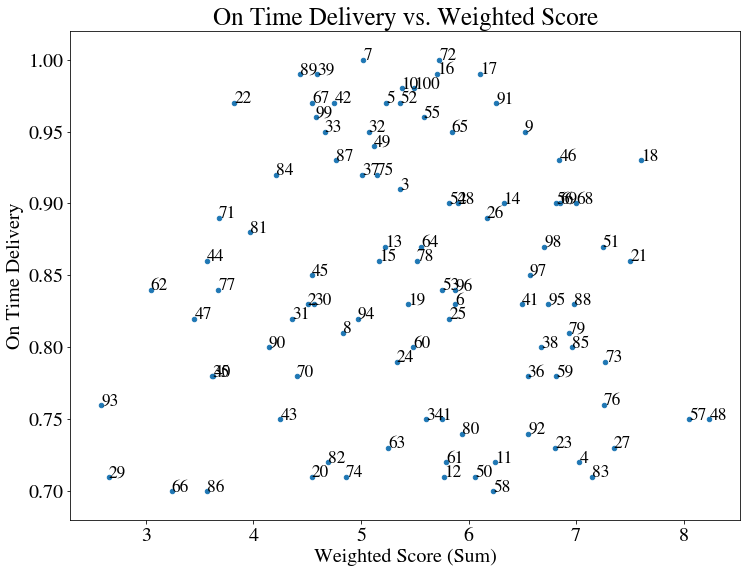

In [7]:
fig, ax = plt.subplots(figsize=(12,9))
supplier_data.plot('Weighted Score (Sum)','On Time Delivery', kind='scatter', ax=ax)
ax.set_title("On Time Delivery vs. Weighted Score",fontsize=25)
ax.set_xlabel('Weighted Score (Sum)',fontsize = 20)
ax.set_ylabel('On Time Delivery',fontsize = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


for i, txt in enumerate(supplier_data['Supplier']):
    ax.annotate(txt, (supplier_data['Weighted Score (Sum)'].iat[i],
                      supplier_data['On Time Delivery'].iat[i]),
                size='xx-large')

plt.show()

As can be seen above, multiple scatter plots would be required to view the various dimensions of the supplier scores. The following code block uses a bubble chart that allows us to view three parameters simultaneously. In this case, we look at unit cost vs. on time delivery and use the weighted sum score for each supplier to set the size of the points. 

**Note that we raise the weighted sum score to a power to achieve a higher degree of differentiation between the bubbles. In practice, you may have to play with these values to determine what works best. In addition, we plot the convex hull of the points (the outer boundary). We will discuss the relevance of this insight in class.**

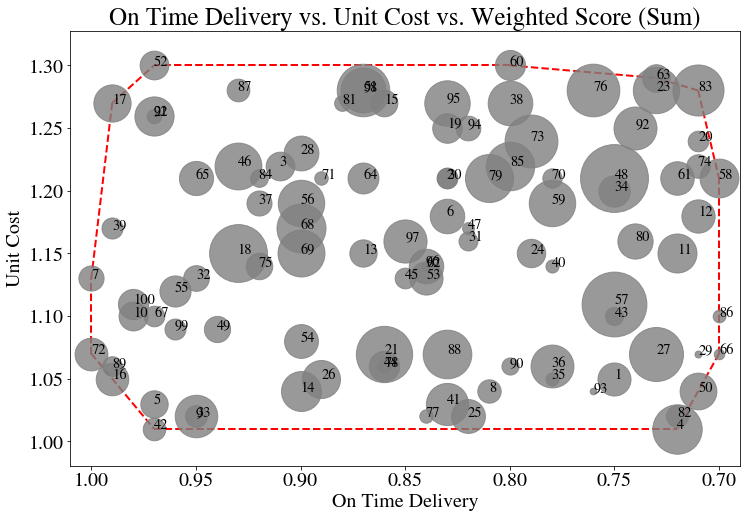

In [8]:
from scipy.spatial import ConvexHull
fig, ax = plt.subplots(figsize=(12,8))

length = supplier_data['On Time Delivery'].count()
a = supplier_data['On Time Delivery'].values
b = supplier_data['Unit Cost'].values
points = np.concatenate([a,b]).reshape((2,length)).T
hull = ConvexHull(points)


for key, row in supplier_data.iterrows():
    ax.scatter(row['On Time Delivery'], row['Unit Cost'], s=row['Weighted Score (Sum)']**4, c='gray', alpha=.8)
    ax.annotate(row['Supplier'].astype(int), xy=(row['On Time Delivery'], row['Unit Cost']),size='x-large')
for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2, zorder=-1)
    
ax.set_title("On Time Delivery vs. Unit Cost vs. Weighted Score (Sum)",fontsize=25)
ax.set_xlabel('On Time Delivery',fontsize = 20)
ax.set_ylabel('Unit Cost',fontsize = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.xlim(supplier_data['On Time Delivery'].max()+0.01, supplier_data['On Time Delivery'].min()-0.01)
plt.show()

Given the large number of suppliers that we are considering, the plot can become quite overwhelming. The following code block shows how we can define a threshold for the maximum weighted score and use it to reduce the number of suppliers viewed. In particular, we define a threshold based on quantiles of the weighted scores for the supplier. For example, the 0.05 quantile returns the weighted score that separates the group of suppliers into the bottom 5% and the top 95%.

In [9]:
@interact(Threshold = (0.00, 0.99, 0.05))

def simulate(Threshold = 0.00):
    score_threshold = supplier_data['Weighted Score (Sum)'].quantile(Threshold)
    candidate_indices = supplier_data['Weighted Score (Sum)'] >= score_threshold
    candidate_supplier_data = supplier_data[candidate_indices]

    fig, ax = plt.subplots(figsize=(12,8))

    length = candidate_supplier_data['On Time Delivery'].count()
    a = candidate_supplier_data['On Time Delivery'].values
    b = candidate_supplier_data['Unit Cost'].values
    points = np.concatenate([a,b]).reshape((2,length)).T
    hull = ConvexHull(points)


    for key, row in candidate_supplier_data.iterrows():
        ax.scatter(row['On Time Delivery'], row['Unit Cost'], s=row['Weighted Score (Sum)']**4, c='gray', alpha=.8)
        ax.annotate(row['Supplier'].astype(int), xy=(row['On Time Delivery'], row['Unit Cost']),size='x-large')
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2, zorder=-1)

    ax.set_title("On Time Delivery vs. Unit Cost vs. Weighted Score (Sum)",fontsize=25)
    ax.set_xlabel('On Time Delivery',fontsize = 20)
    ax.set_ylabel('Unit Cost',fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.xlim(supplier_data['On Time Delivery'].max()+0.01, supplier_data['On Time Delivery'].min()-0.01)
    plt.show()

A Jupyter Widget

### Checking the Robustness of Rankings

Aside from setting weights, rankings, and computing scores, it may be worthwhile checking the robustness of the supplier selection. Specifically, since both the rankings and weights are subjective, it would be worth knowing how small changes in these quantities affect the supplier rankings. The following code block allows a user to define a perturbation range that is used to randomly vary the weights for the various criteria in the range +/- the defined perturbation. This is done for a specified number of times and the number of times that a particular supplier appears as a top supplier is counted and plotted.

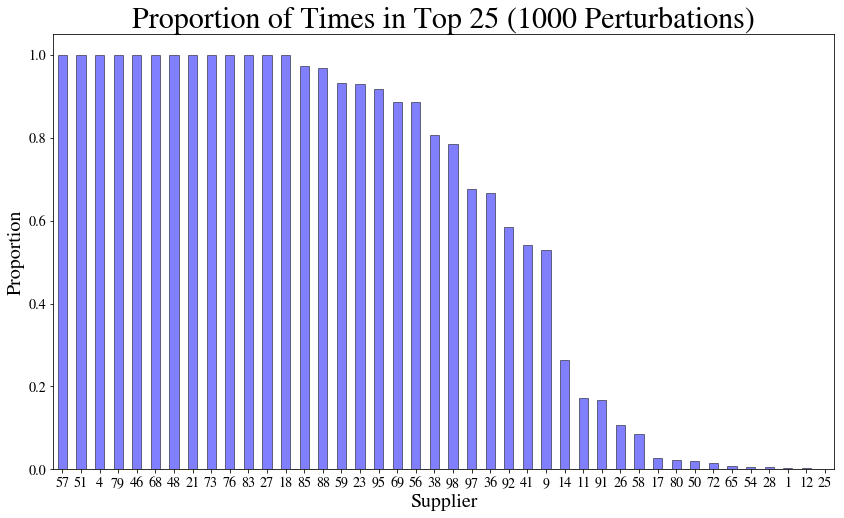

In [10]:
from collections import Counter
np.random.seed(42)

criteria = ['Warranty Terms',
            'Payment Terms',
            'Technical Support',
            'Sustainability Efforts',
            'Financial Stability']

criteria_weights = np.array([2,4,6,7,9])

perturbations = 1000
min_perturbation = -2.0
max_perturbation = 2.0
Top_suppliers = 25

supplier_list = []
if len(criteria) != len(criteria_weights):
    print('The number of criteria and weights that you specified do not match!')
else:
    for _ in range(perturbations):
        perturbed_weights = np.random.uniform(low=min_perturbation,
                                              high=max_perturbation+0.1,
                                              size=len(criteria_weights)) + criteria_weights
        perturbed_weights = np.maximum(perturbed_weights,0)
        perturbed_weights = np.minimum(perturbed_weights,10)
        data = Compute_Weighted_Score_Sum(supplier_data, criteria, perturbed_weights)
        temp = data.nlargest(Top_suppliers,columns = 'Weighted Score (Sum)')
        top_suppliers_list = temp['Supplier'].values.tolist()
        supplier_list.append(top_suppliers_list)

sum_supplier_counts = Counter(x for sublist in supplier_list for x in sublist)
sum_supplier_counts = pd.DataFrame.from_dict(sum_supplier_counts, orient='index').reset_index()
sum_supplier_counts = sum_supplier_counts.rename(columns={'index':'Supplier', 0:'Count'})
sum_supplier_counts.sort_values(by='Count',inplace=True,ascending=False)
sum_supplier_counts['Weighted Sum Proportion'] = sum_supplier_counts['Count']/perturbations
sum_supplier_counts.set_index('Supplier')


fig, ax = plt.subplots(1, 1, figsize = (14,8))
sum_supplier_counts.plot.bar(x='Supplier',y='Weighted Sum Proportion',ax = ax, color='b', alpha = 0.5, edgecolor ='k')
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=14)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=14)
ax.set_title('Proportion of Times in Top {} ({} Perturbations)'.format(Top_suppliers,perturbations),size=30)
ax.set_ylabel('Proportion',size=20)
ax.set_xlabel('Supplier',size=20)
ax.legend_.remove()

plt.show()

### Weighted Product Ranking Method

We will now consider the weighted product method for ranking alternatives. Using the notation we defined earlier, the weighted product score for alternative $A_{i}$ is given by:

$$\prod_{j=1}^{n}(a_{ij})^{w_{j}},\mbox{ for }i=1,2,3,\ldots,m.$$

The following code block defines a function that determines the weighted product ranking for a set of alternatives (in our case suppliers) whose rankings are stored in a dataframe. As was the case with the function for calculating the weighted sum score, this function expects three arguments:  
1. a dataframe that includes columns for the various criteria and scores for each supplier, 
2. a list of the column names for the criteria to be scored, and 
3. an array of the weights for the criteria. 

**Note that the number of criteria in the criteria list should be the same as the number of entries in the array!**

In [11]:
def Compute_Weighted_Score_Multiply(df,criteria_list,weights_array):
    '''This function computes a weighted score for suppliers based on the specified criteria and weights
    
    Arguments
    df: the dataframe that includes the scores for suppliers on each citeria.
    The dataframe should be structured such that columns contain the scores for all suppliers
    
    criteria_list: a list object that specifies the columns in df that contain the various criteria scores
    
    weights_array: a numpy array that specifies the weights for the various criteria specified in the criteria_list. 
    The order in which the weights are specified should match the orderin which the criteria are provided
    '''
    
    normalized_weights = weights_array/weights_array.sum()
    
    df['Weighted Score (Product)'] = 1
    for i in range(len(criteria_list)):
        current_criteria = criteria_list[i]
        current_weight = normalized_weights[i]
        df['Weighted Score (Product)'] *= df[current_criteria]**current_weight

    return df

The following code block demonstrates the use of the `Compute_Weighted_Score_Multiply` function.

In [12]:
criteria = ['Warranty Terms',
            'Payment Terms',
            'Technical Support',
            'Sustainability Efforts',
            'Financial Stability']

criteria_weights = np.array([2,4,6,7,9])

if len(criteria) != len(criteria_weights):
    print('The number of criteria and weights that you specified do not match!')
else:
    supplier_data = Compute_Weighted_Score_Multiply(supplier_data,criteria,criteria_weights)

supplier_data.head()

,Supplier,Warranty Terms,Payment Terms,Technical Support,Sustainability Efforts,Financial Stability,Unit Cost,Lead Time (Days),On Time Delivery,Weighted Score (Sum),Weighted Score (Product)
0,1,2.42,2.80,8.25,3.09,8.21,1.05,8,0.75,5.57,5.06
1,2,6.51,1.88,3.60,6.45,4.31,1.21,13,0.83,4.86,4.20
2,3,8.51,1.06,2.97,9.36,5.06,1.22,12,0.91,6.00,4.37
3,4,4.63,4.60,5.84,7.34,9.20,1.01,9,0.72,7.09,6.80
4,5,4.62,7.44,1.50,8.93,4.01,1.03,7,0.97,5.32,4.38


As was done for the weighted sum method, the following code block executes the robustness check for the weighted product ranking.

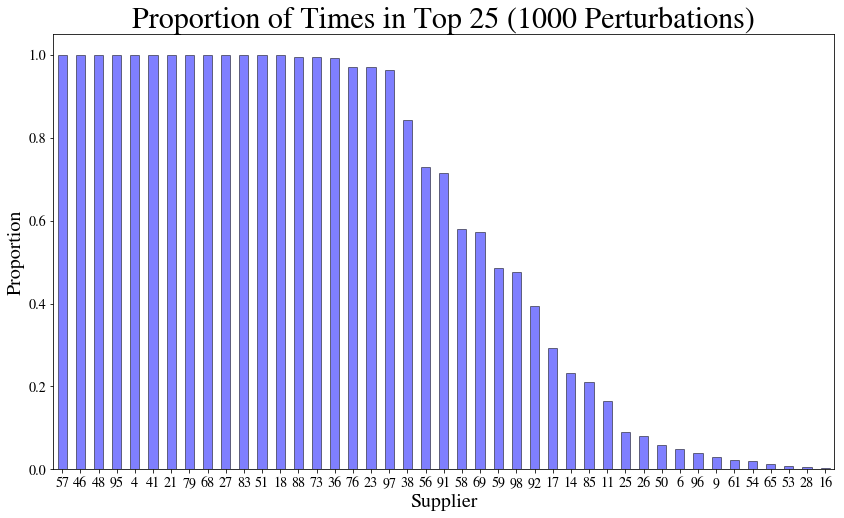

In [13]:
from collections import Counter
np.random.seed(42)

criteria = ['Warranty Terms',
            'Payment Terms',
            'Technical Support',
            'Sustainability Efforts',
            'Financial Stability']

criteria_weights = np.array([2,4,6,7,9])

perturbations = 1000
min_perturbation = -2.0
max_perturbation = 2.0
Top_suppliers = 25

supplier_list = []
if len(criteria) != len(criteria_weights):
    print('The number of criteria and weights that you specified do not match!')
else:
    for _ in range(perturbations):
        perturbed_weights = np.random.uniform(low=min_perturbation,
                                              high=max_perturbation+0.1,
                                              size=len(criteria_weights)) + criteria_weights
        perturbed_weights = np.maximum(perturbed_weights,0)
        perturbed_weights = np.minimum(perturbed_weights,10)
        data = Compute_Weighted_Score_Multiply(supplier_data, criteria, perturbed_weights)
        temp = data.nlargest(Top_suppliers,columns = 'Weighted Score (Product)')
        top_suppliers_list = temp['Supplier'].values.tolist()
        supplier_list.append(top_suppliers_list)

product_supplier_counts = Counter(x for sublist in supplier_list for x in sublist)
product_supplier_counts = pd.DataFrame.from_dict(product_supplier_counts, orient='index').reset_index()
product_supplier_counts = product_supplier_counts.rename(columns={'index':'Supplier', 0:'Count'})
product_supplier_counts.sort_values(by='Count',inplace=True,ascending=False)
product_supplier_counts['Weighted Product Proportion'] = product_supplier_counts['Count']/perturbations
product_supplier_counts.set_index('Supplier')


fig, ax = plt.subplots(1, 1, figsize = (14,8))
product_supplier_counts.plot.bar(x='Supplier',y='Weighted Product Proportion',ax = ax, color='b', alpha = 0.5, edgecolor ='k')
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=14)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=14)
ax.set_title('Proportion of Times in Top {} ({} Perturbations)'.format(Top_suppliers,perturbations),size=30)
ax.set_ylabel('Proportion',size=20)
ax.set_xlabel('Supplier',size=20)
ax.legend_.remove()

plt.show()

The following code block merges the results for the two robustness checks to demonstrate how the solutions for the weighted sum and weighted product methods can differ.

In [14]:
merged_data = sum_supplier_counts.merge(product_supplier_counts,on='Supplier',how='outer')
merged_data.set_index('Supplier',inplace=True)
merged_data.drop(labels = ['Count_x','Count_y'], axis = 1,inplace=True)
merged_data.fillna(value=0,inplace=True)
merged_data['Difference'] = np.abs(merged_data['Weighted Product Proportion'] - merged_data['Weighted Sum Proportion'])
merged_data.sort_values(by=['Weighted Sum Proportion','Weighted Product Proportion'],ascending=False,inplace=True)
merged_data

,Weighted Sum Proportion,Weighted Product Proportion,Difference
Supplier,,,
57,1.00,1.00,0.00
51,1.00,1.00,0.00
4,1.00,1.00,0.00
79,1.00,1.00,0.00
46,1.00,1.00,0.00
68,1.00,1.00,0.00
48,1.00,1.00,0.00
21,1.00,1.00,0.00
83,1.00,1.00,0.00
